In [5]:
#import libraries
#data
from sklearn.datasets import load_iris

# dataframe/array
import numpy as np
import pandas as pd

# data split
from sklearn.model_selection import train_test_split

# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# plotting
import matplotlib.pyplot as plt

# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

Q1) Load the iris dataset from sklearn.datasets. What type of object is returned? Hint: use load_iris().

In [7]:
#load iris dataset
iris = load_iris()

#find out type of object returned 
print(type(iris), 'is the type of object returned.')

<class 'sklearn.utils._bunch.Bunch'> is the type of object returned.


Bunch is a dictionary that consists of keys as attribute (eg: iris.target_names, iris.feataure_names, iris.target, etc.)

Q2) Assign the features to a variable called X and the class labels to variable called y. Hint: look at iris.keys(), iris.target_names, iris.feature_names, etc

In [10]:
#Explanatory Data Analysis (EDA)
#get a better understanding of the data. What are we dealing with? Is it accurate? Does anything need to be modified/changed?

In [11]:
#assign features to variable X
X = pd.DataFrame(iris.data, columns = iris.feature_names)

In [12]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [13]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [20]:
print(f"There are {len(X)} records")

There are 150 records


In [22]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [55]:
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [73]:
#assign class label to variable y
y = pd.DataFrame(iris.target, columns = ['species_label'])
print(y, '0 = setosa, 1 = versicolor, 2 = virginica')

     species_label
0                0
1                0
2                0
3                0
4                0
..             ...
145              2
146              2
147              2
148              2
149              2

[150 rows x 1 columns] 0 = setosa, 1 = versicolor, 2 = virginica


Q3) Split the data into train and test sets. Hint: use train_test_split()

In [76]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10, shuffle = True, stratify = y)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (120, 4), X_test shape: (30, 4)
y_train shape: (120, 1), y_test shape: (30, 1)


Stratify = y (this allows equal distribution of the 'y', (species) in the train and test model to allow correct comparison

Q4) Choose your favourite classifier and see if you can classify the Iris species.

In [71]:
#create the logistic regression model, maximum iteration = # of times it will run until it stops
log_model = LogisticRegression(max_iter = 200)

#train the model
#.values.ravel() flattens 2D array into 1D (because made y into a dataframe with another column)
log_model.fit(X_train, y_train.values.ravel())

#make predictions on the test set
y_pred_log = log_model.predict(X_test)

#evaluate model by calculating accuracy and print accuracy with 2 decimal places
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Accuracy of logistic regression on test set: {accuracy_log:.2f}')

Accuracy of logistic regression on test set: 1.00


Reason for choosing LR: Simple, efficient on this dataset, handles complexity of multiple classes well, high accuracy

In [203]:
#create the random forest classifier model, random_state = controls randomness, "the answer to life, the universe, and everything"
rf_model = RandomForestClassifier(random_state = 42)

#train the model
#.values.ravel() flattens 2D array into 1D 
rf_model.fit(X_train, y_train.values.ravel())

#test the model
y_pred_rf = rf_model.predict(X_test)

#evaluate model by calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of classification on test set: {accuracy_rf:.2f}')

Accuracy of classification on test set: 1.00


Reasoning for choosing RF: Performs well on small and large datasets, can manage multiple classes and features, higher accuracy

Q5) Compute the confusion matrix, precision, and recall.

In [207]:
#classification report for logistic regression model
##y_test and y_pred are true and predicted labels
print(classification_report(y_test,y_pred_log))
print('The model is performing perfectly on this dataset (as the precision, recall and F1 scores are 1.00).')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

The model is performing perfectly on this dataset (as the precision, recall and F1 scores are 1.00).


Precision (positive identification for each class), recall (fraction of actual positive found), F1 score (balances precision and recall, 0 bad & 1 good)

In [210]:
#classification report for random forest model
##y_test and y_pred are true and predicted labels
print(classification_report(y_test, y_pred_rf))
print('The model is performing perfectly on this dataset (as the precision, recall and F1 scores are 1.00).')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

The model is performing perfectly on this dataset (as the precision, recall and F1 scores are 1.00).


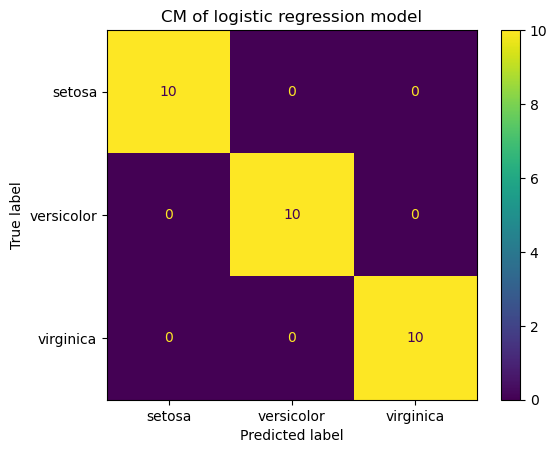

The confusion matrix indicates 100% accuracy for all three classes.


In [228]:
##y_test and y_pred_log are true and predicted labels
#plot confusion matrix for logistic regression model
disp = ConfusionMatrixDisplay(confusion_matrix=confm_log, display_labels=iris.target_names)
disp.plot()
plt.title('CM of logistic regression model')
plt.show()
print('The confusion matrix indicates 100% accuracy for all three classes.')

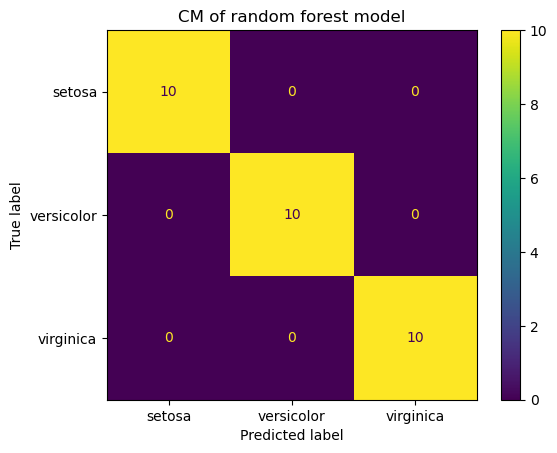

The confusion matrix indicates 100% accuracy for all three classes.


In [230]:
##y_test and y_pred_rf are true and predicted labels
#plot confusion matrix for random forest model
disp = ConfusionMatrixDisplay(confusion_matrix=confm_rf, display_labels=iris.target_names)
disp.plot()
plt.title('CM of random forest model')
plt.show()
print('The confusion matrix indicates 100% accuracy for all three classes.')

Ta da! As you can see both classifiers and models work perfectly with the iris data set. 